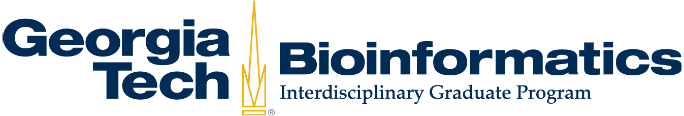

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 6th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 5 + 30 + 45 + 20 + 45 = 150*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file</h3>
    <p>We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
</div>

In [1]:
#Check you SAM file here.
!wc -l ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam

95152721 /home/hice1/yappaji3/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam


<div class="alert alert-block alert-warning">
    <h3>1.2 Check your SAM file</h3>
    <p>Show that your SAM file is sorted</p>
</div>

In [2]:
#Show that your SAM file is sorted by genomic coordinates.
!samtools view -H ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam | head -n 5

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316


In [ ]:
#This is a repeat from last project, but we want to check the sorted file again.

<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

In [ ]:
#Information about the pileup format.

<span style="color:red">Pileup format is a text-based format for summarizing the base calls of aligned reads to a reference sequence. This format facilitates visual display of SNP/indel calling and alignment</span>

In [3]:
#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.

<span style="color:red">Sequence identifier<br>
    Position in sequence (starting from 1)<br>
    Reference nucleotide at that position<br>\n",
    Number of aligned reads covering that position (depth of coverage)<br>
    Bases at that position from aligned reads<br>
    Phred Quality of those bases, represented in ASCII with -33 offset</span>

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [7]:
#Your command for pileup here.
!samtools mpileup -f ~/biol6150/ProjectSubmissions/Group19/Project3/Results/hg38.fa ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.Sorted.sam > ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup

In [4]:
#Show the first 10 lines of the Pileup file.
!head -n 10 ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup
#Show the 10,000 - 10,010 lines of the Pileup file.
!head -n 10010 ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup | tail -n +10000
#Show the 200,000 - 200,010 lines of the Pileup file.
!head -n 200010 ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup | tail -n +200000

chr1	10520	t	1	^0,	B
chr1	10521	g	1	,	D
chr1	10522	c	1	,	D
chr1	10523	t	2	,^0.	DE
chr1	10524	c	2	,.	DJ
chr1	10525	c	2	,.	DJ
chr1	10526	g	2	,.	DJ
chr1	10527	c	2	,.	DJ
chr1	10528	c	2	,.	DJ
chr1	10529	t	2	,.	DJ
chr1	32342	A	1	.	J
chr1	32343	G	1	.	J
chr1	32344	T	1	.	G
chr1	32345	T	1	.	I
chr1	32346	C	1	.	I
chr1	32347	T	1	.	J
chr1	32348	G	1	.	J
chr1	32349	G	1	.	J
chr1	32350	G	1	.	J
chr1	32351	A	1	.	J
chr1	32352	A	1	.	J
chr1	1173522	A	1	.	J
chr1	1173523	G	1	.	H
chr1	1173524	A	1	.	H
chr1	1173525	A	1	.	H
chr1	1173526	T	1	.	H
chr1	1173527	G	1	.	G
chr1	1173528	C	1	.	F
chr1	1173529	T	1	.	F
chr1	1173530	C	1	.	F
chr1	1173531	A	2	.^L,	F>
chr1	1173532	G	2	.,	FC


<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [5]:
#Show the 100,000th entry here.
!awk 'NR==100000' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup

chr1	930239	G	152	,$.,.,...,,.,,.,.,,,.,,..,,....,.......,,,,.....,,.............,.,,,,,...,,......,.......,...,...........,.,,..,,,..,......,,.,,..,...T,.....,,..,,..,.^A,^A,	EDICJ@CCJJ@JJCJCIJID@JDDJJDDDDI@DDDDDCE;IJDDEECJJEDFF7DHAHHHHFDJ<DDBDEJIDBIJ9DBJDJIIJJJJ@IIJDJJGFJJIIJJJ<JDBJJDDDJGDJJJJJIDD@B<IJDJGGBDEJHJGD<HGDBHJBJD?


In [ ]:
#Explain the entry here.

<span style="color:red">The read results contains several dots and commas, which means that there are several bases that matched the reference on the forward and reverse strands. There are also 2 A's and a T which show that those nucleotides did not match the reference on the forward strand. Finally, there is a $ which signifies the end of a read  segment and 2 ^'s which mark the start of read segments.</span> 

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [5]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 == "chr20"' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup > chr20info.csv

In [9]:
#Plot your graph and show it here (matplotlib/seaborn)
import pandas as pd
df = pd.read_csv('chr20info.csv', header=None, sep='\t')

In [11]:
df

,0,1,2,3,4,5
0,chr20,60001,T,1,^!.,=
1,chr20,60002,G,1,.,F
2,chr20,60003,T,1,.,I
3,chr20,60004,T,1,.,J
4,chr20,60005,C,1,.,I
...,...,...,...,...,...,...
9368728,chr20,64329995,G,1,.,=
9368729,chr20,64329996,T,1,.,;
9368730,chr20,64329997,G,1,.,3
9368731,chr20,64329998,A,1,.,;


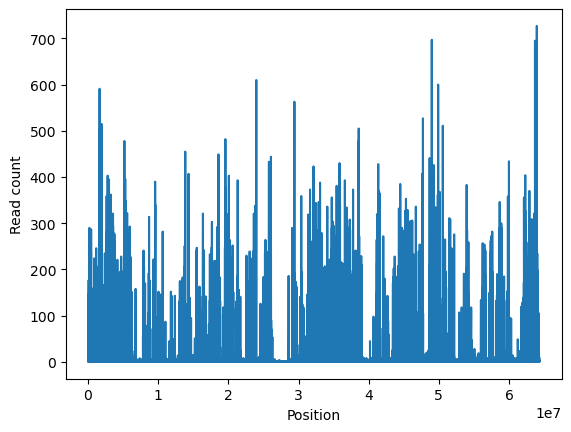

In [13]:
read_count = df[3]
position = df[1]

import matplotlib.pyplot as plt
plt.plot(position, read_count)
plt.xlabel('Position')
plt.ylabel('Read count')
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 50+30+10+40 = 130*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [6]:
#Use VarScan for calling variants. Look up the appropriate command for this.
!varscan

VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [10]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.
!varscan mpileup2snp ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup --min-reads2 10 --output-vcf > ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf

#!varscan mpileup2snp ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup --min-reads2 10 --max-coverage 30 --output-vcf > ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup
358146721 bases in pileup file
51301 variant positions (48963 SNP, 2338 indel)
1173 were failed by the strand-filter
47826 variant positions reported (47826 SNP, 0 indel)


<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [12]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.

!awk '$1 == "chr16" && $2 == 24094348' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf



chr16	24094348	.	G	A	.	PASS	ADP=35;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:62:35:35:18:17:48.57%:5.7598E-7:38:35:2:16:5:12


In [29]:
#There could be multiple variants in this range, please select one.

In [21]:
#The information is there in your VCF file.

<span style="color:red">The average depth of bases for this variant is 35 reads. This is indicated by "ADP=35" in the info column of the variant.</span> 

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [23]:
#Same as above, there are multiple ways of doing this.

In [ ]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

In [13]:
#Write your command and show the number of indels.
!varscan mpileup2indel ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup --min-reads2 10 --output-vcf > ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014_indel.vcf

Only indels will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.mpileup
358146721 bases in pileup file
51301 variant positions (48963 SNP, 2338 indel)
1173 were failed by the strand-filter
2302 variant positions reported (0 SNP, 2302 indel)


<span style="color:red">2302 variant positions reported (0 SNP, 2302 indel)<br>
2302 indels</span> 

<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [13]:
#Select the variant.
# !bcftools view -r 2:203000000-230000000 ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf
!awk '$1 == "chr2" && $2 == 219055690' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf

chr2	219055690	.	A	G	.	PASS	ADP=101;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:186:101:101:51:50:49.5%:2.4886E-19:36:35:24:27:26:24


In [ ]:
#Variation observed and number of copies for reference allele.

<span style="color:red">At this position, the 0/1 variation is observed. This means the individual is heterozygous and carries one copy of the reference allele (A) at this position and one copy of the alternative allele(G) at this position.</span>  

In [27]:
#Number of reads supporting the ref & alt allele.

<span style="color:red">Forward reads supporting the alternative allele: 26 (ADF)<br>
Reverse reads supporting the alternative allele: 24 (ADR)<br>
    26+24=50<br>
Forward reads supporting the reference allele: 24 (RDF)<br>
Reverse reads supporting the reference allele: 27 (RDR)<br>
    27+24 = 51
</span>  


# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 20 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

<span style="color:red">Variants Before</span>  

In [21]:
#Number of variants before
!grep -vc '^#' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf

47826


In [16]:
#Extract variants
!varscan filter ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf --min-reads2 51 --output-file ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014_filtered50.vcf

Min coverage:	10
Min reads2:	51
Min strands2:	1
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.1
Reading input from /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014.vcf
47826 entries in input stream
0 had no genotype
0 were called wild-type
0 failed coverage
37767 failed reads2
0 failed strands
0 failed quality
0 failed variant frequency < 0.2
0 failed P-value > 0.1
0 were removed near indels
10059 passed filters


<span style="color:red">Variants After</span>  

In [17]:
!grep -vc '^#' ~/biol6150/ProjectSubmissions/Group19/Project3/Results/SRR766014_filtered50.vcf

10059
